In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [6]:
plt.style.use(['science'])
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [7]:
import spin_models as spin

In [8]:
from astropy import constants as const
from astropy import units as u
solar_mass_kg = const.M_sun.value

In [9]:
df_binary = pd.read_csv("Data/binary-merger-data.csv",index_col= False)

In [10]:
M1 = df_binary["M1"].to_numpy()
M2 = df_binary["M2"].to_numpy()

In [11]:
def find_q(M1,M2):
    if (M2>M1):
        q = M1/M2
    else:
        q = M2/M1
    
    return q

In [12]:
def kick_vel_for_a_spin_model(model,M1,M2,angle_arg_ret = "No"):

    a1 = []
    theta1 = []
    a2 = []
    theta2 = []
    recoil = []

    for i in range(len(M1)):

        S1,S2 = model()
        a1.append(np.linalg.norm(S1))
        a2.append(np.linalg.norm(S2))

        theta1.append(np.arccos(S1[2]/np.linalg.norm(S1)))
        theta2.append(np.arccos(S2[2]/np.linalg.norm(S2)))
        
        q_i = find_q(M1[i],M2[i])
        Vk = spin.gw_kick(q_i,S1,S2)

        recoil.append(np.linalg.norm(Vk))

    if angle_arg_ret == "Yes":
        return recoil,a1,theta1,theta2,recoil
    else:
        return recoil

In [13]:
#V_rh = kick_vel_for_a_spin_model(spin.random_high,M1,M2,angle_arg_ret = "No")
V_rd = kick_vel_for_a_spin_model(spin.random_dry,M1,M2,angle_arg_ret = "No")
#V_hot = kick_vel_for_a_spin_model(spin.hot,M1,M2,angle_arg_ret = "No")
V_cold = kick_vel_for_a_spin_model(spin.cold,M1,M2,angle_arg_ret = "No")
V_deg5 = kick_vel_for_a_spin_model(spin.deg5_high,M1,M2,angle_arg_ret = "No")

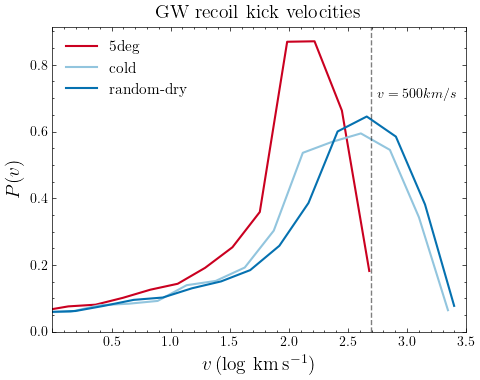

In [332]:
plt.figure(figsize=[5,4])

bin_heights, bin_borders = np.histogram(np.log10(V_deg5),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,color="#ca0020",lw=1.5,label="5deg")

bin_heights, bin_borders = np.histogram(np.log10(V_cold),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,color="#92c5de",lw=1.5,label="cold")

# bin_heights, bin_borders = np.histogram(np.log10(V_hot),bins=30,density=True)
# bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
# plt.plot(bin_centers,bin_heights,label="hot")

bin_heights, bin_borders = np.histogram(np.log10(V_rd),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,color="#0571b0",lw=1.5,label="random-dry")

# bin_heights, bin_borders = np.histogram(np.log10(V_rh),bins=30,density=True)
# bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
# plt.plot(bin_centers,bin_heights,label="random-high")
plt.axvline(x = np.log10(500),color = "k",linestyle = "--",alpha=0.5)

plt.text(np.log10(500)+0.05,0.7,'$v = 500 km/s$')

plt.xlim(0,3.5)
plt.ylim(0,)
plt.legend(fontsize=11)
plt.xlabel(r"$v \, (\log \, \text{km} \, \text{s}^{-1}$)",fontsize=14)
plt.ylabel(r"$P(v)$",fontsize=14)

ax = plt.gca()
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)

plt.title("GW recoil kick velocities",fontsize=14)
plt.tight_layout()
plt.savefig("Figures/binary-kick-velocities.pdf")

In [15]:
import scipy.stats as stats

In [16]:
N_sample = 100000

theta_binsize = 2
theta_max = 90
theta_min = -2
theta_num = int((theta_max-theta_min)/theta_binsize)


theta_rd = np.arccos(stats.uniform(-1,2).rvs(N_sample))
theta_rd = theta_rd * 180/np.pi
for i in range(len(theta_rd)):
    if theta_rd[i] > 90:
        theta_rd[i] = 180 - theta_rd[i]
theta_rd_counts,theta_rd_edges = np.histogram(theta_rd,range=(theta_min,theta_max),bins=theta_num,density=True)
theta_rd_bins = theta_rd_edges[:-1] + (theta_rd_edges[1] - theta_rd_edges[0])/2

alpha = 8
beta = 4
a_rd = stats.beta(alpha,beta).rvs(N_sample)
a_rd_counts,a_rd_edges = np.histogram(a_rd,range=(0,1.1),bins=35,density=True)
a_rd_bins = a_rd_edges[:-1] + (a_rd_edges[1] - a_rd_edges[0])/2

alpha = 2.018
beta = 5.244
cold = stats.beta(alpha,beta).rvs(N_sample)
cold = cold * 180/np.pi
cold_counts,cold_edges = np.histogram(cold,range=(theta_min,theta_max),bins=theta_num,density=True)
cold_bins = cold_edges[:-1] + (cold_edges[1] - cold_edges[0])/2

alpha = 5.935
beta = 1.856
a_cold = stats.beta(alpha,beta).rvs(N_sample)
a_cold_counts,a_cold_edges = np.histogram(a_cold,range=(0,1.1),bins=35,density=True)
a_cold_bins = a_cold_edges[:-1] + (a_cold_edges[1] - a_cold_edges[0])/2

loc = np.cos(5*np.pi/180)
scale = np.cos(0) - np.cos(5*np.pi/180)
theta_5deg = np.arccos(stats.uniform(loc,scale).rvs(N_sample*10))
theta_5deg = theta_5deg * 180/np.pi
theta5deg_counts,theta_5deg_edges = np.histogram(theta_5deg,range=(theta_min,theta_max),bins=theta_num,density=True)
theta5deg_bins = theta_5deg_edges[:-1] + (theta_5deg_edges[1] - theta_5deg_edges[0])/2

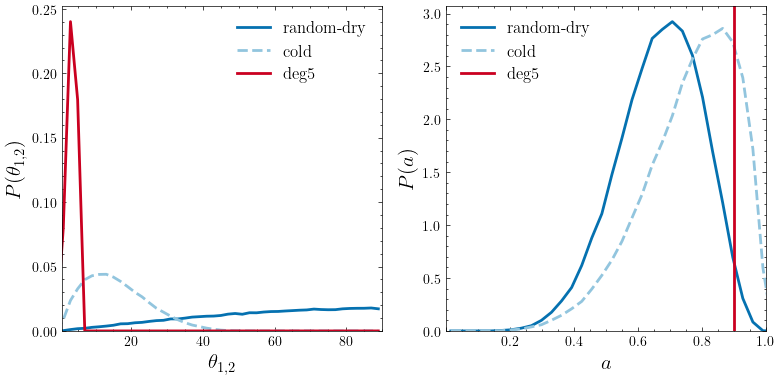

In [341]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[1].plot(a_rd_bins,a_rd_counts,color="#0571b0",lw=2,label="random-dry")
ax[1].plot(a_cold_bins,a_cold_counts,color="#92c5de",linestyle="--",lw=2,label="cold")
ax[1].axvline(x=0.9,color="#ca0020",lw=2,label="deg5")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,)
ax[1].legend(fontsize=12)
ax[1].set_ylabel(r"$P(a)$",fontsize=15)
ax[1].set_xlabel(r"$a$",fontsize=15)
ax[1] = plt.gca()
xticks = ax[1].xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)

ax[0].plot(theta_rd_bins,theta_rd_counts,color="#0571b0",lw=2,label="random-dry")
ax[0].plot(cold_bins,cold_counts,color="#a2c8ec",lw=2,linestyle="--",label="cold")
ax[0].plot(theta5deg_bins,theta5deg_counts,color="#ca0020",lw=2,label="deg5")
ax[0].set_xlim(0.5,90)
ax[0].set_ylim(0,)
ax[0].legend(fontsize=12)
ax[0].set_ylabel(r"$P(\theta_{1,2})$",fontsize=15)
ax[0].set_xlabel(r"$\theta_{1,2}$",fontsize=15)


fig.tight_layout()
plt.savefig("Figures/spin-models-magnitude-and-angle.pdf")

In [18]:
import BH_triple_kicks_data as BH_trip

In [342]:
Trip_data = pd.read_csv("Data/Triple_outcomes_N_50.csv")

In [343]:
N = 50

In [344]:
import scipy.stats as st

In [345]:
def trip_qout():
    a = 1.36869939
    loc = 1.67145567
    scale = 2.91035809
    return st.gamma.rvs(a,loc,scale)


def trip_log_v():
    mean = 2.87678065
    stdev = 0.31454837
    return st.norm.rvs(mean,stdev)


def v_scaled_with_qcut(m3,qout):

    v_HL = trip_log_v()
    q_HL = 1/trip_qout()
    M_tot = 6 * 10**8
    m3_HL = (q_HL * M_tot)/(1+q_HL) 

    sf = np.sqrt((m3_HL*(1+q_HL))/(m3*(1+qout)))

    return sf*10**(v_HL)

In [364]:
vcount = []
v_max = 5
v_min = 1
v_binsize = 0.1
binss = []
for i in range(N):
   slingshot_kicks = []
   for j in range(531*i,531*(i+1)):
      m1 = Trip_data["M1"].iloc[i]
      m2 = (Trip_data["M1"].iloc[i]) / (Trip_data["qin"].iloc[i])
      m3 = Trip_data["qout"].iloc[i] * (m1 + m2)
      m_sort = np.sort([m1,m2,m3])

      m3 = m_sort[0]
      qout = m_sort[0]/(m_sort[1]+m_sort[2])

      if((qout > 10**-3) & (m3>=10**8)):
         slingshot_kicks.append(v_scaled_with_qcut(m3,qout))

   if slingshot_kicks:

      bincounts,binedges = np.histogram(np.log10(slingshot_kicks),range=(v_min,v_max),bins=int((v_max-v_min)/v_binsize),density=True)
      bins = binedges[:-1] + (binedges[1] - binedges[0])/2
      binss.append(bins)
      vcount.append(bincounts)   

In [365]:
vcount_no_qcut = []
v_max = 5
v_min = 1
v_binsize = 0.1
binss = []
for i in range(N):
   slingshot_kicks = []
   for j in range(531*i,531*(i+1)):
      m1 = Trip_data["M1"].iloc[i]
      m2 = (Trip_data["M1"].iloc[i]) / (Trip_data["qin"].iloc[i])
      m3 = Trip_data["qout"].iloc[i] * (m1 + m2)
      m_sort = np.sort([m1,m2,m3])

      m3 = m_sort[0]
      qout = m_sort[0]/(m_sort[1]+m_sort[2])

      if(qout > 10**-8):
         # slingshot_kicks.append(v_scaled_with_qcut(m3,qout))
         slingshot_kicks.append(BH_trip.v_scaled(m3,qout))
         
   if slingshot_kicks:

      bincounts,binedges = np.histogram(np.log10(slingshot_kicks),range=(v_min,v_max),bins=int((v_max-v_min)/v_binsize),density=True)
      bins = binedges[:-1] + (binedges[1] - binedges[0])/2
      binss.append(bins)
      vcount_no_qcut.append(bincounts)   

Text(0.5, 1.0, 'Slingshot kick velocity')

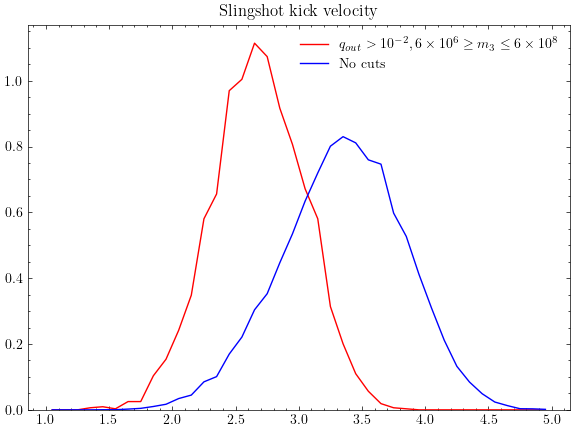

In [367]:
plt.figure(figsize=[7,5])
plt.plot(bins,np.mean(vcount,axis=0),color="red",label=r"$q_{out}>10^{-2},  6 \times 10^6 \geq m_3 \leq 6 \times 10^8$")
plt.plot(bins,np.mean(vcount_no_qcut,axis=0),color="blue",label="No cuts")
plt.ylim(0,)
plt.legend(fontsize=10)
plt.title("Slingshot kick velocity")

Text(0.5, 1.0, 'Recoil kick velocities')

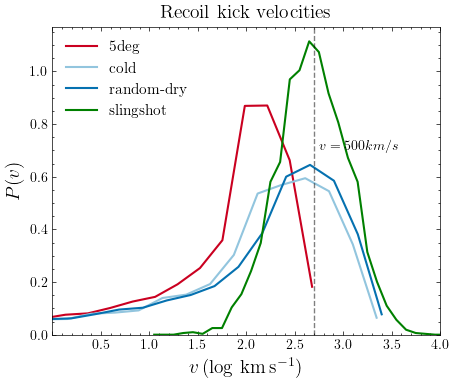

In [377]:
plt.figure(figsize=[5,4])

bin_heights, bin_borders = np.histogram(np.log10(V_deg5),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,color="#ca0020",lw=1.5,label="5deg")

bin_heights, bin_borders = np.histogram(np.log10(V_cold),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,color="#92c5de",lw=1.5,label="cold")

# bin_heights, bin_borders = np.histogram(np.log10(V_hot),bins=30,density=True)
# bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
# plt.plot(bin_centers,bin_heights,label="hot")

bin_heights, bin_borders = np.histogram(np.log10(V_rd),bins=30,density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers,bin_heights,color="#0571b0",lw=1.5,label="random-dry")

plt.plot(bins,np.mean(vcount,axis=0),color="green",lw=1.5,label="slingshot")
# bin_heights, bin_borders = np.histogram(np.log10(V_rh),bins=30,density=True)
# bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
# plt.plot(bin_centers,bin_heights,label="random-high")
plt.axvline(x = np.log10(500),color = "k",linestyle = "--",alpha=0.5)

plt.text(np.log10(500)+0.05,0.7,'$v = 500 km/s$')

plt.xlim(0,4)
plt.ylim(0,)
plt.legend(fontsize=11)
plt.xlabel(r"$v \, (\log \, \text{km} \, \text{s}^{-1}$)",fontsize=14)
plt.ylabel(r"$P(v)$",fontsize=14)

ax = plt.gca()
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)

plt.title("Recoil kick velocities",fontsize=14)